In [1]:
import sys
sys.path.append('../../../')
from SynRBL.rsmi_utils import load_database
import re
from rdkit import Chem
from SynAnalysis.analysis_utils import remove_atom_mapping_from_reaction_smiles, count_boundary_atoms_products_and_calculate_changes, calculate_chemical_properties


/Users/tieulongphan/Documents/Task/TACsy/SynRBL/Pipeline/Validation/Analysis/SynAnalysis/analysis_process.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '> 10' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['carbon_difference']>10, 'carbon_difference'] = '> 10'
/Users/tieulongphan/Documents/Task/TACsy/SynRBL/Pipeline/Validation/Analysis/SynAnalysis/analysis_process.py:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '> 8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['fragment_count']>8, 'fragment_count'] = '> 8'
/Users/tieulongphan/Documents/Task/TACsy/SynRBL/Pipeline/Validation/Analysis/SynAnalysis/analysis_process.py:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pan

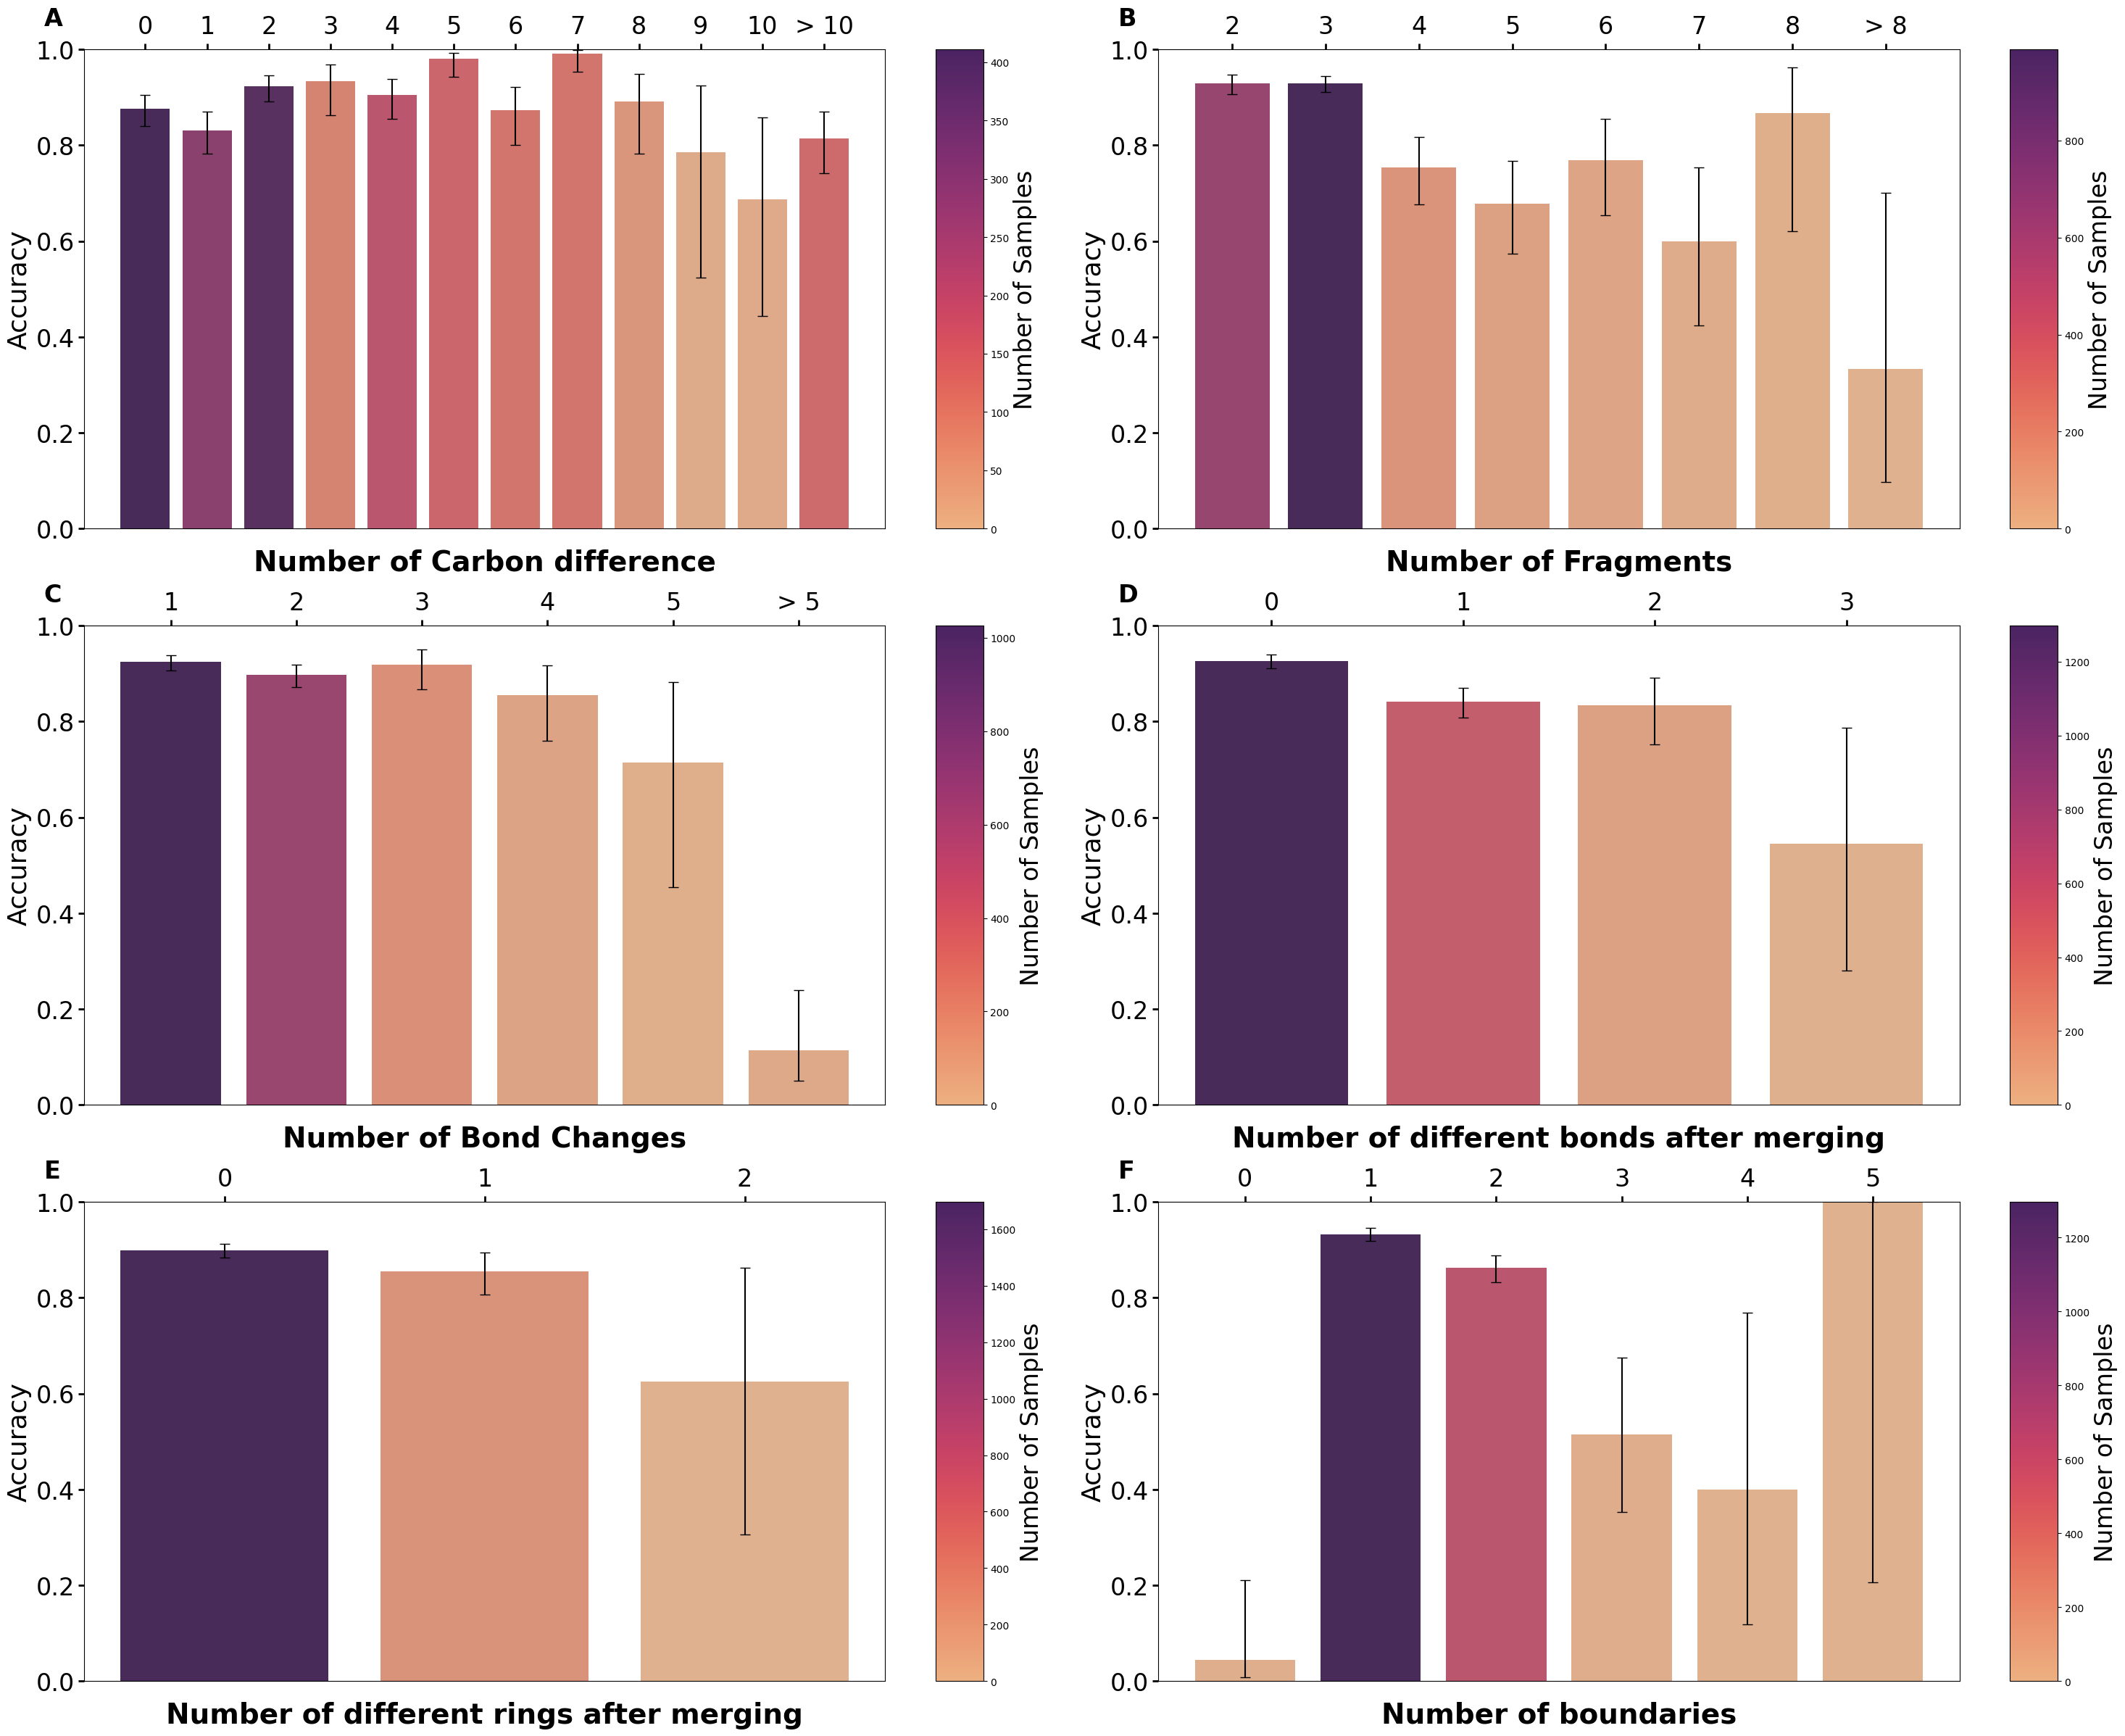

In [2]:
from SynAnalysis.analysis_process import AnalysisProcess
list_data = ['golden_dataset', 'Jaworski', 'USPTO_random_class', 'USPTO_diff', 'USPTO_unbalance_class']
pipeline_path = '../../../Pipeline'
data_path = '../../../Data'
process = AnalysisProcess(list_data, pipeline_path, data_path)

data = process.process_and_combine_datasets(remove_undetected=True)
data_all = process.standardize_columns(data)
from SynAnalysis.eda_analysis import EDAVisualizer

columns = ['carbon_difference', 'fragment_count', 'Bond Changes', 'bond_change_merge', 'ring_change_merge', 'num_boundary']
titles = ['Number of Carbon difference', 'Number of Fragments', 'Number of Bond Changes', 'Number of different bonds after merging', 
          'Number of different rings after merging', 'Number of boundaries']
visualizer = EDAVisualizer(data_all, columns, titles)
visualizer.visualize_accuracy(chart_type='bar', show_values=False, error_bar=True, save_path=None)

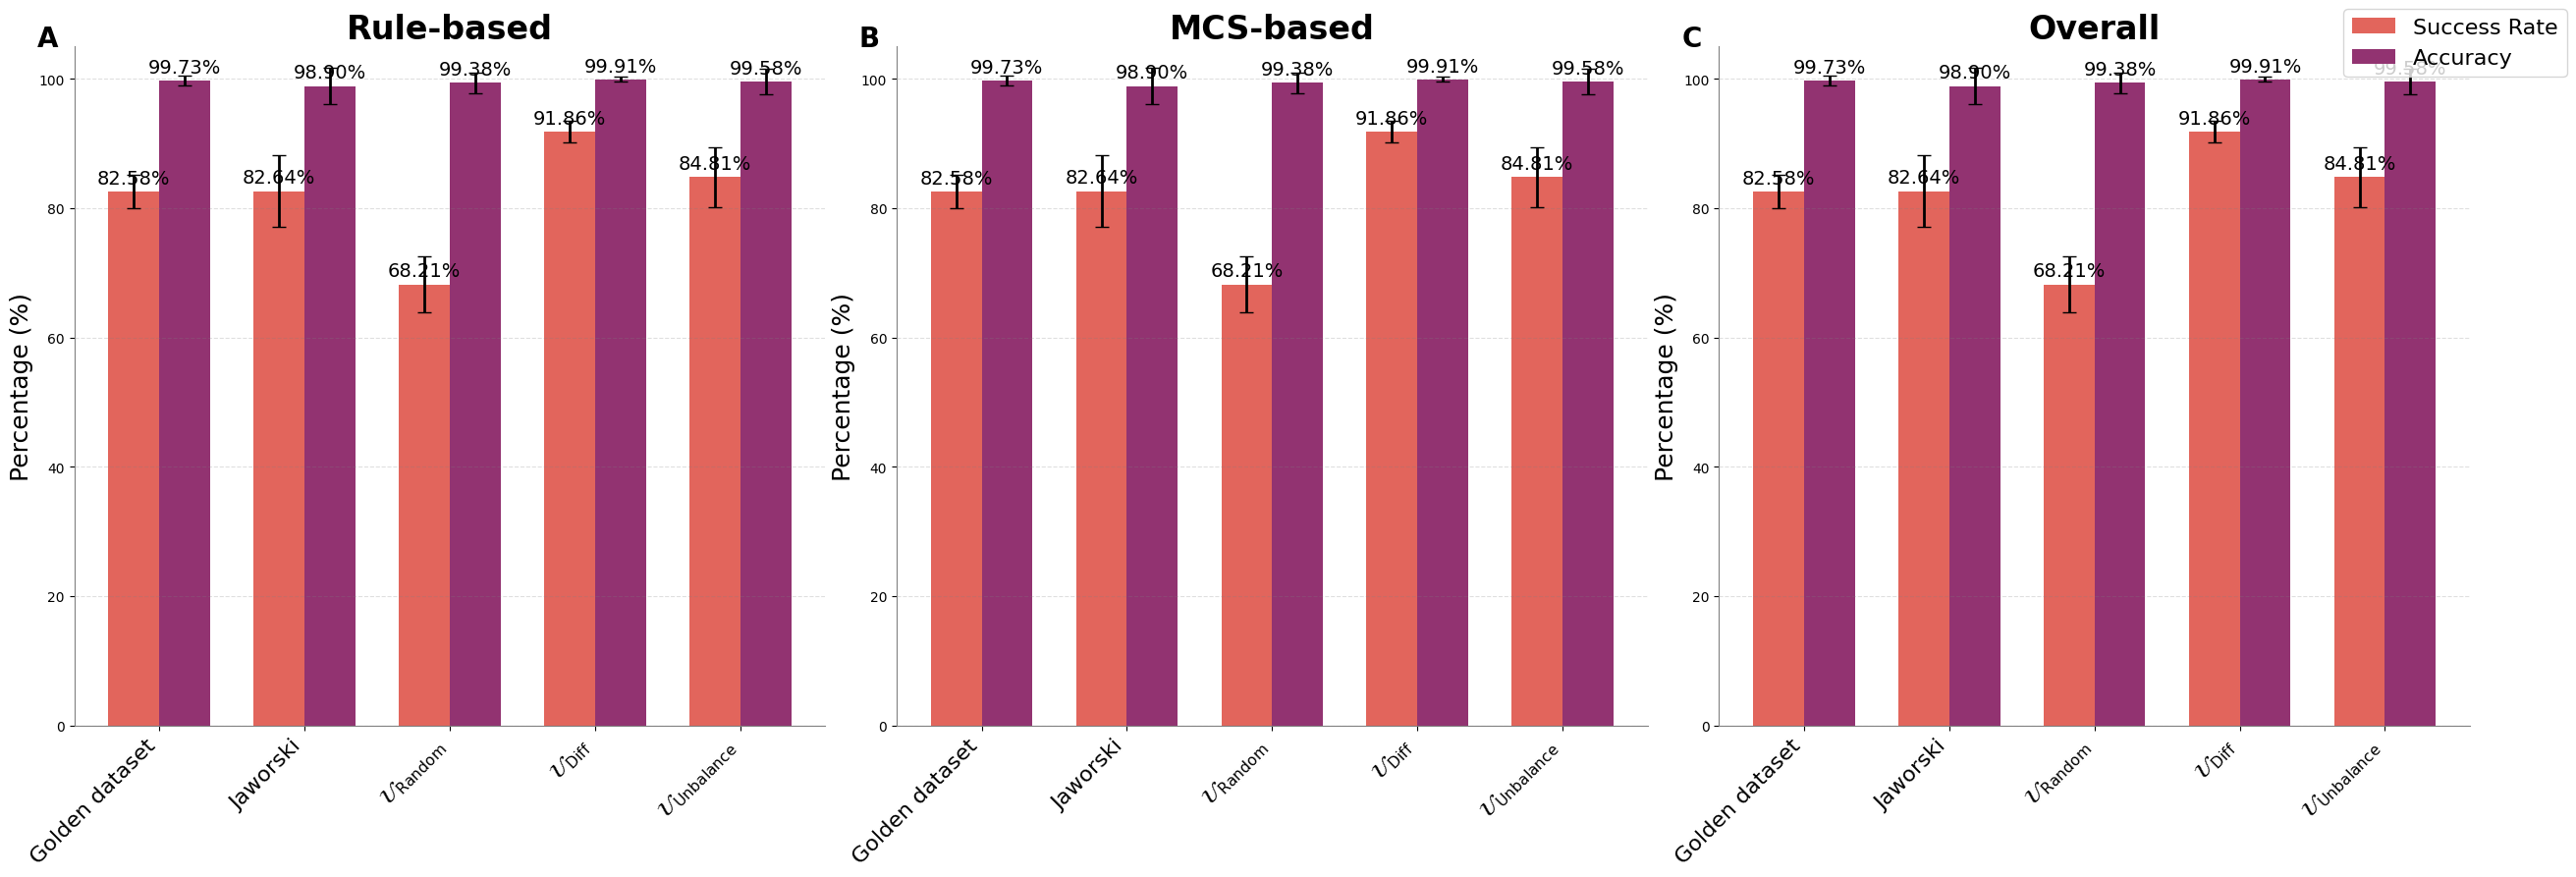

In [4]:
import pandas as pd
import numpy as np
datasets = ["Golden dataset", "Jaworski", "$\mathcal{U}_{\mathrm{Random}}$", "$\mathcal{U}_{\mathrm{Diff}}$", "$\mathcal{U}_{\mathrm{Unbalance}}$"]
success_rate = np.array([82.58, 82.64, 68.21, 91.86, 84.81]) / 100  # Convert to proportions
accuracy = np.array([99.73, 98.90, 99.38, 99.91, 99.58]) / 100  # Convert to proportions
unbalance = np.array([913, 219, 475, 1253, 283])
data = pd.DataFrame({'Dataset': datasets, 'Success Rate': success_rate, 'Accuracy': accuracy, 'Unbalance': unbalance})
from SynAnalysis.visualizer import barplot_accuracy_comparison
barplot_accuracy_comparison([data,data,data], layout='horizontal', show_values=True)


In [4]:
from SynRBL.SynMCSImputer.SubStructure.mcs_process import ensemble_mcs
from SynRBL.SynUtils.data_utils import load_database, save_database
from SynRBL.SynMCSImputer.SubStructure.extract_common_mcs import ExtractMCS
from SynRBL.SynMCSImputer.MissingGraph.find_graph_dict import find_graph_dict
from SynRBL.SynMCSImputer.MissingGraph.refinement_uncertainty import RefinementUncertainty

mcs1 = load_database('../../../Data/Validation_set/golden_dataset/MCS/Condition_1.json.gz')
mcs2 = load_database('../../../Data/Validation_set/golden_dataset/MCS/Condition_2.json.gz')
mcs3 = load_database('../../../Data/Validation_set/golden_dataset/MCS/Condition_3.json.gz')
mcs4 = load_database('../../../Data/Validation_set/golden_dataset/MCS/Condition_4.json.gz')
mcs5 = load_database('../../../Data/Validation_set/golden_dataset/MCS/Condition_5.json.gz')
datasets = ["Configuration 1", "Configuration 2", "Configuration 3", "Configuration 4", "Configuration 5", 'Ensemble']
golden = [256, 279, 211, 269, 398, 195]
jaworski = [26, 30, 22, 33, 46, 21]
random = [66, 80, 60, 75, 203, 60]
diff = [44, 50, 42, 45, 128, 40]
unbalance = [37, 37, 33, 35, 130, 33]

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    "Configuration": ["Configuration 1", "Configuration 2", "Configuration 3", "Configuration 4", "Configuration 5", 'Ensemble'] * 5,
    "Dataset": ["Golden dataset"] * 6 + ["Jaworski"] * 6 + ["$\mathcal{U}_{\mathrm{Random}}$"] * 6 + ["$\mathcal{U}_{\mathrm{Diff}}$"] * 6 + ["$\mathcal{U}_{\mathrm{Unbalance}}$"] * 6,
    "Value": [256, 279, 211, 269, 398, 195, 26, 30, 22, 33, 46, 21, 66, 80, 60, 75, 203, 60, 44, 50, 42, 45, 128, 40, 37, 37, 33, 35, 130, 33]
}

df = pd.DataFrame(data)


In [5]:
from SynAnalysis.visualizer import mcs_comparsion
mcs_comparsion([mcs1, mcs1, mcs2, mcs3, mcs4, mcs5], df, 67)

NameError: name 'mcs1' is not defined

In [6]:

list_data = ['golden_dataset', 'Jaworski', 'USPTO_random_class', 'USPTO_diff', 'USPTO_unbalance_class']
pipeline_path = '../../../Pipeline'
data_path = '../../../Data'
process = AnalysisProcess(list_data, pipeline_path, data_path)

data_check = process.process_and_combine_datasets(remove_undetected=False).drop(['R-id', 'reactions','Index', 'mcs_carbon_balanced'], axis =1)



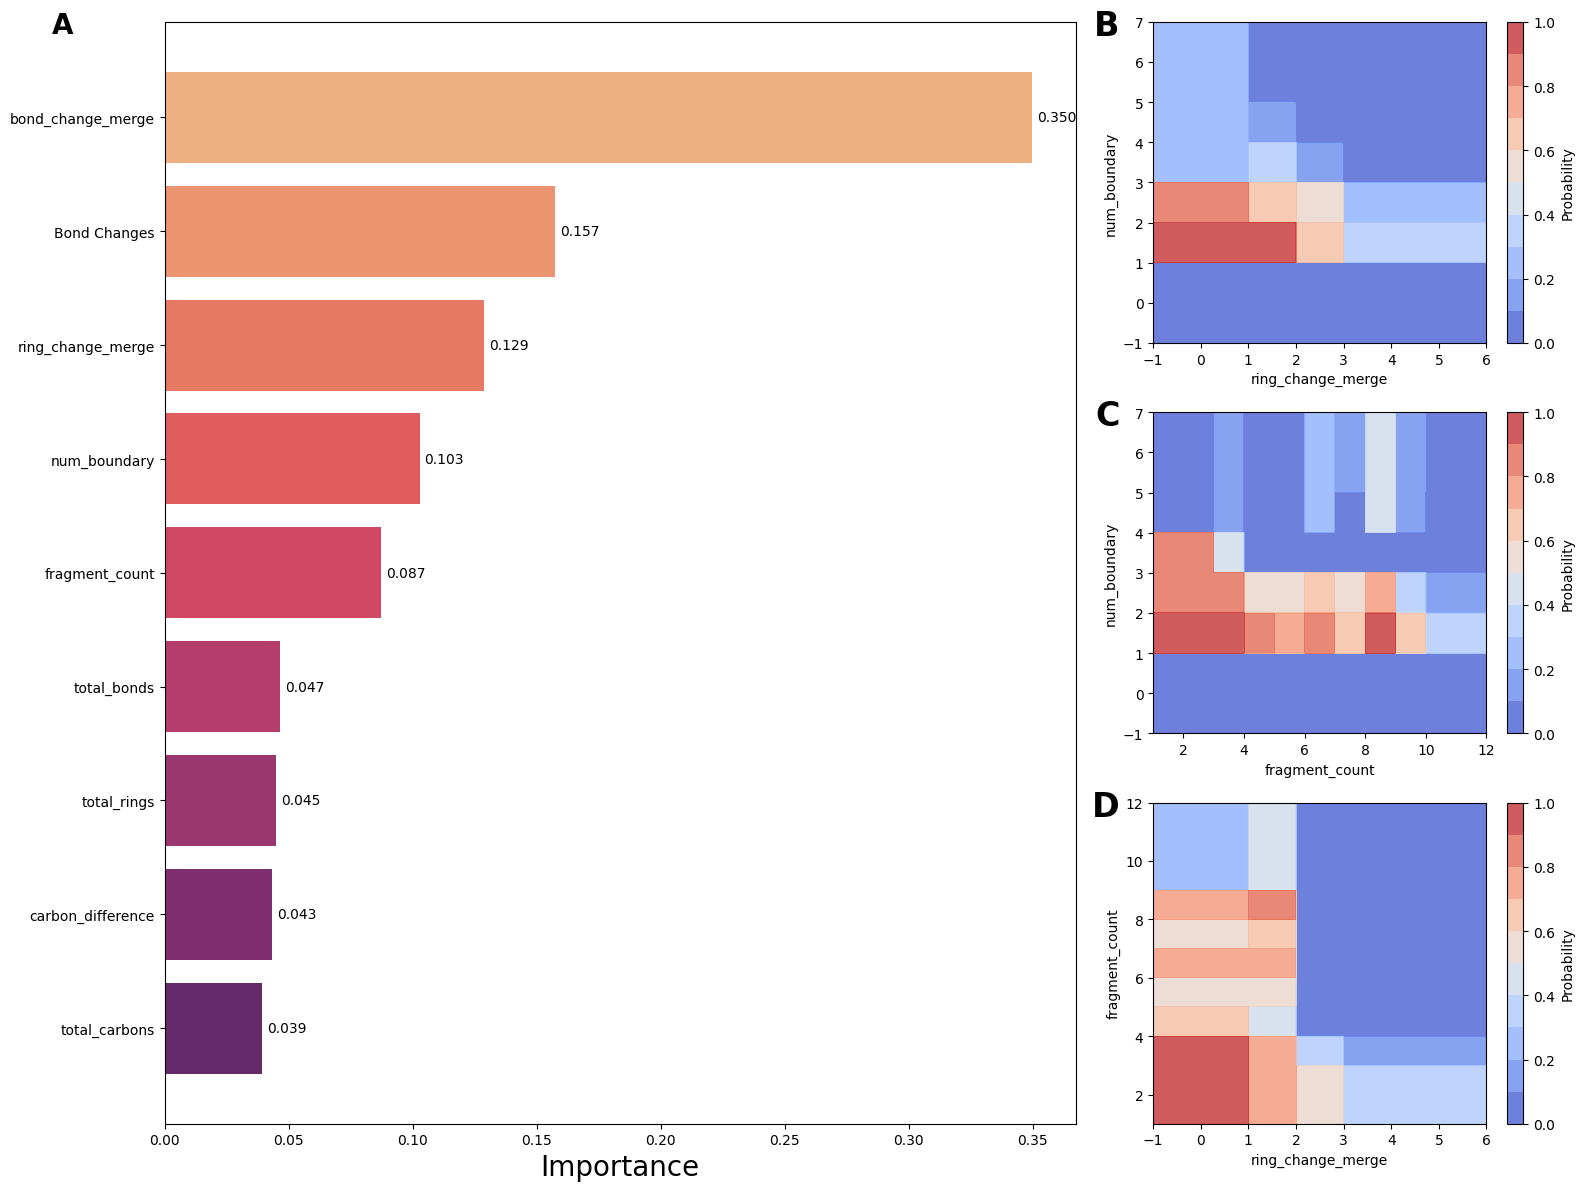

In [7]:
from SynAnalysis.feature_analysis import FeatureAnalysis
vis = FeatureAnalysis(data_check, 'Result', [('ring_change_merge','num_boundary'),
                                           ('fragment_count','num_boundary'), 
                                           ('ring_change_merge','fragment_count')])
vis.visualize(save_path=None)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as Pipeline

data_raw = process.process_and_combine_datasets(remove_undetected=False).drop(['R-id', 'reactions', 'Bond Changes',
                                                                                'Index', 'mcs_carbon_balanced'], axis =1)
X, y = data_raw.drop('Result', axis=1), data_raw['Result']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

steps = [('scaler', MinMaxScaler()), ('over', SMOTEENN(sampling_strategy='minority', random_state=42)), ('model', XGBClassifier(random_state=42))]
pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        87
           1       0.95      0.94      0.94       364

    accuracy                           0.91       451
   macro avg       0.85      0.87      0.86       451
weighted avg       0.91      0.91      0.91       451



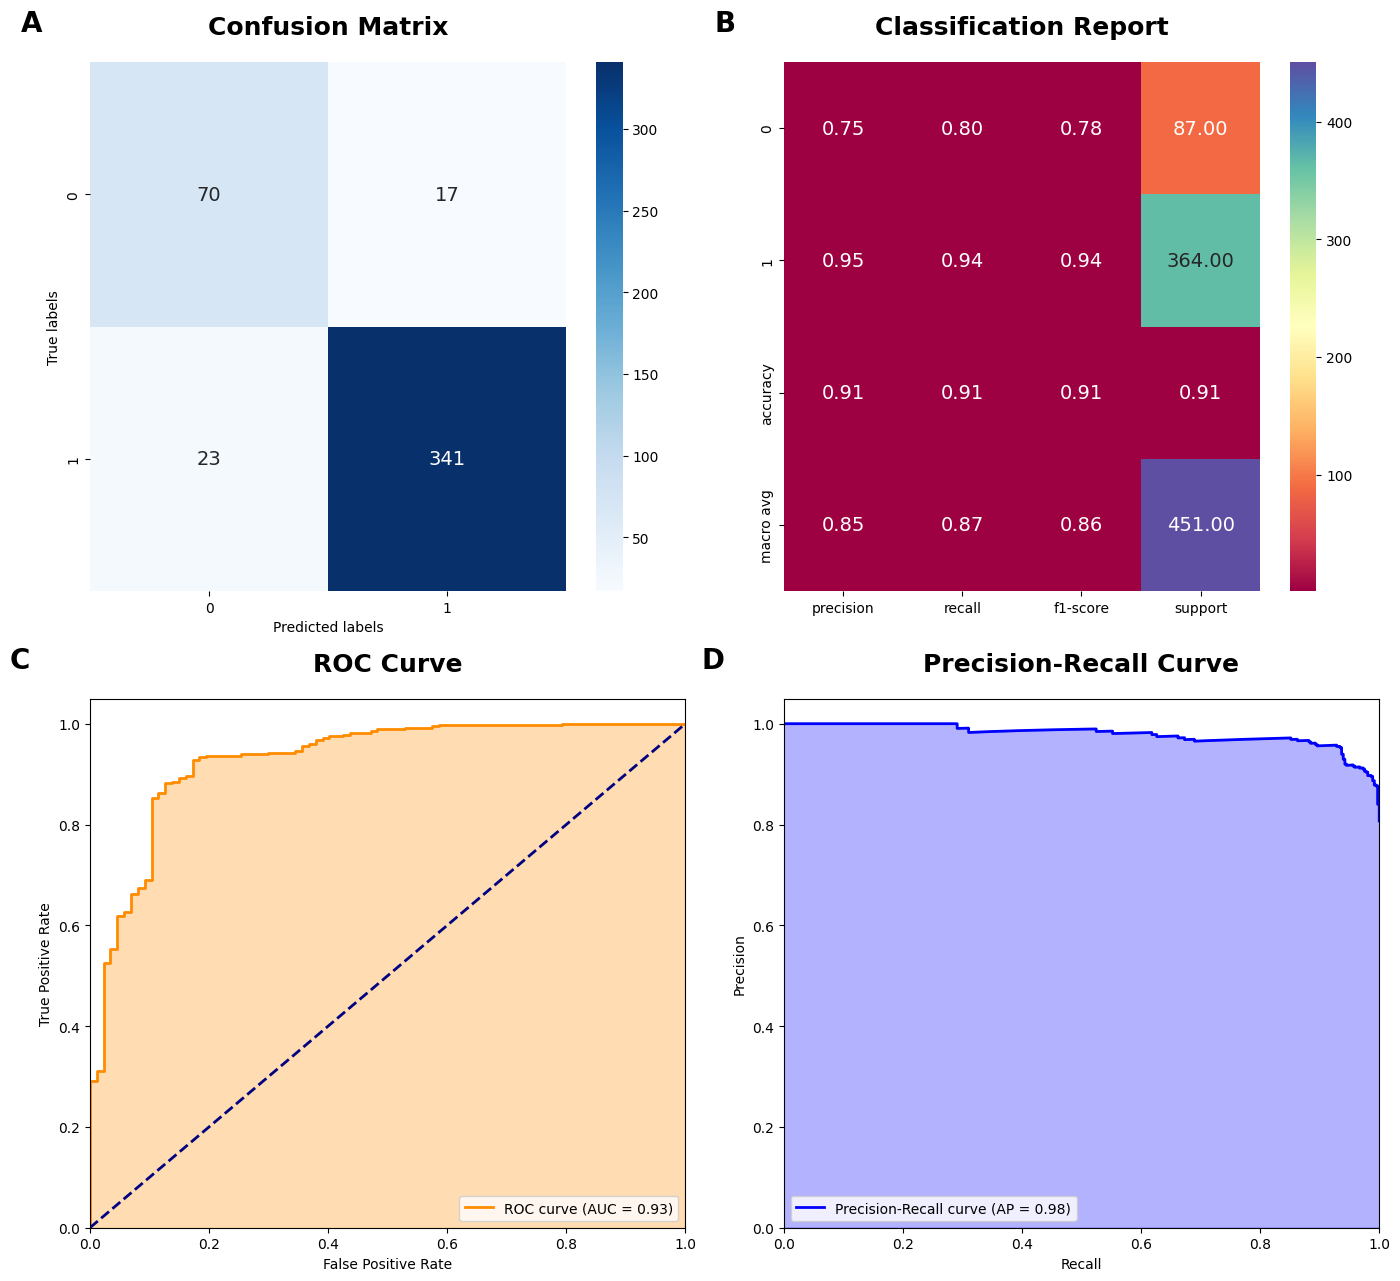

In [8]:
from SynAnalysis.visualizer import classification_visualization

classification_visualization(y_test, y_pred, pipeline.predict_proba(X_test)[:,1],
                             save_path = None, figsize = (14, 14))